In [1]:
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import proj3d
import numpy as np

from lab3 import gradient_ascent, normalized_gradient_ascent, ExpPoly2D
from zadania import gradient_descent, momentum, nesterov, adam

In [2]:
def draw_contours(ax, func, extent, num_linspace=100, num_contours=25):
    X = np.linspace(extent[0], extent[1], num=num_linspace)
    Y = np.linspace(extent[2], extent[3], num=num_linspace)
    Z = np.vectorize(func, signature="(n)->()")(np.stack(np.meshgrid(X, Y), axis=-1))
    cs = ax.contour(X, Y, Z, num_contours,
        cmap="Vega20b",
        linewidths=1, linestyles="solid")
    ax.clabel(cs, inline=1, fontsize=5)

def draw_surface(ax, func, extent, num_linspace=100):
    X = np.linspace(extent[0], extent[1], num=num_linspace)
    Y = np.linspace(extent[2], extent[3], num=num_linspace)
    X, Y = np.meshgrid(X, Y)
    Z = np.vectorize(func, signature="(n)->()")(np.stack((X,Y), axis=-1))
    surf = ax.plot_surface(X, Y, Z, cmap="Vega20b")

In [3]:
rng_poly = np.random.RandomState(seed=43)
f_ascent = ExpPoly2D(
    cs=[
        .001*(rng_poly.choice(5, size=(3,5))-2),
        .3*rng_poly.normal(size=(3,3)),
        .8*rng_poly.normal(size=(6,6)),
        .01*np.array([[0,5,1],[5,0,0],[1,0,0]], dtype=np.float32),
        .1*np.array([[0,0,1],[0,0,0],[1,0,0]], dtype=np.float32),],
    ds=[1., 1., 1., 3., 1.])

In [4]:
rng_poly = np.random.RandomState(seed=43)
f_descent = ExpPoly2D(
    cs=[
        .001*(rng_poly.choice(5, size=(3,5))-2),
        .3*rng_poly.normal(size=(3,3)),
        .8*rng_poly.normal(size=(6,6)),
        .01*np.array([[0,5,1],[5,0,0],[1,0,0]], dtype=np.float32),
        .1*np.array([[0,0,1],[0,0,0],[1,0,0]], dtype=np.float32),],
    ds=[-1., -1., -1., -3., -1.])

<IPython.core.display.Javascript object>


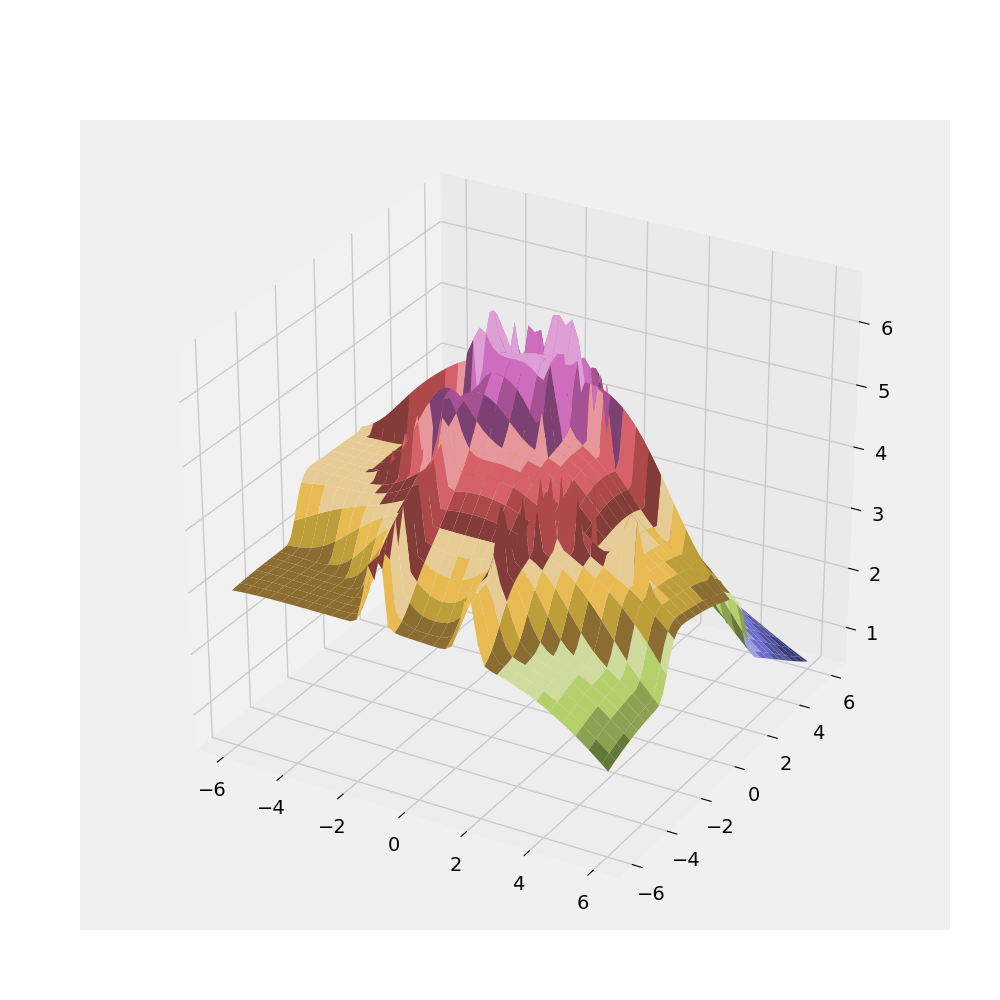

/home/tux/miniconda3/envs/ml2018/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
extent=(-6, 6, -6, 6)
draw_surface(ax, f_ascent, extent, num_linspace=60)

<IPython.core.display.Javascript object>


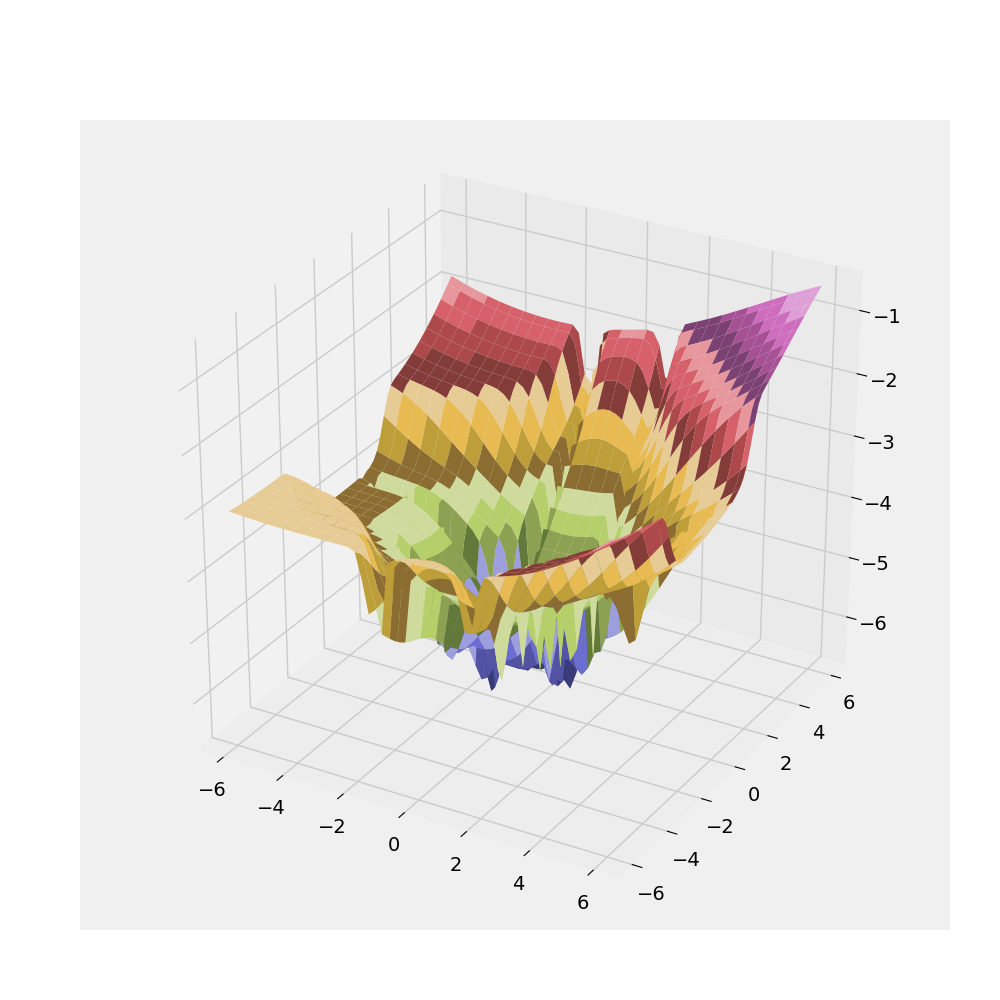

/home/tux/miniconda3/envs/ml2018/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
extent=(-6, 6, -6, 6)
draw_surface(ax, f_descent, extent, num_linspace=60)

In [7]:
rng_start = np.random.RandomState(seed=43)

gradient_ascent_optimizers = {"ga"+str(i): gradient_ascent(
    f=f_ascent,
    starting_point=rng_start.uniform(-6,6,size=2),
    learning_rate=.1) for i in range(20)}

normalized_gradient_ascent_optimizers = {"ga"+str(i): normalized_gradient_ascent(
    f=f_ascent,
    starting_point=rng_start.uniform(-6,6,size=2),
    learning_rate=.1) for i in range(20)}

In [8]:
# Ta komórka zadziała dopiero po rozwiązaniu zadania

rng_start = np.random.RandomState(seed=43)

nesterov_optimizers = {"ga"+str(i): nesterov(
    f=f_descent,
    starting_point=rng_start.uniform(-8,8,size=2),
    learning_rate=.3,
    gamma=.2) for i in range(25)}

<IPython.core.display.Javascript object>


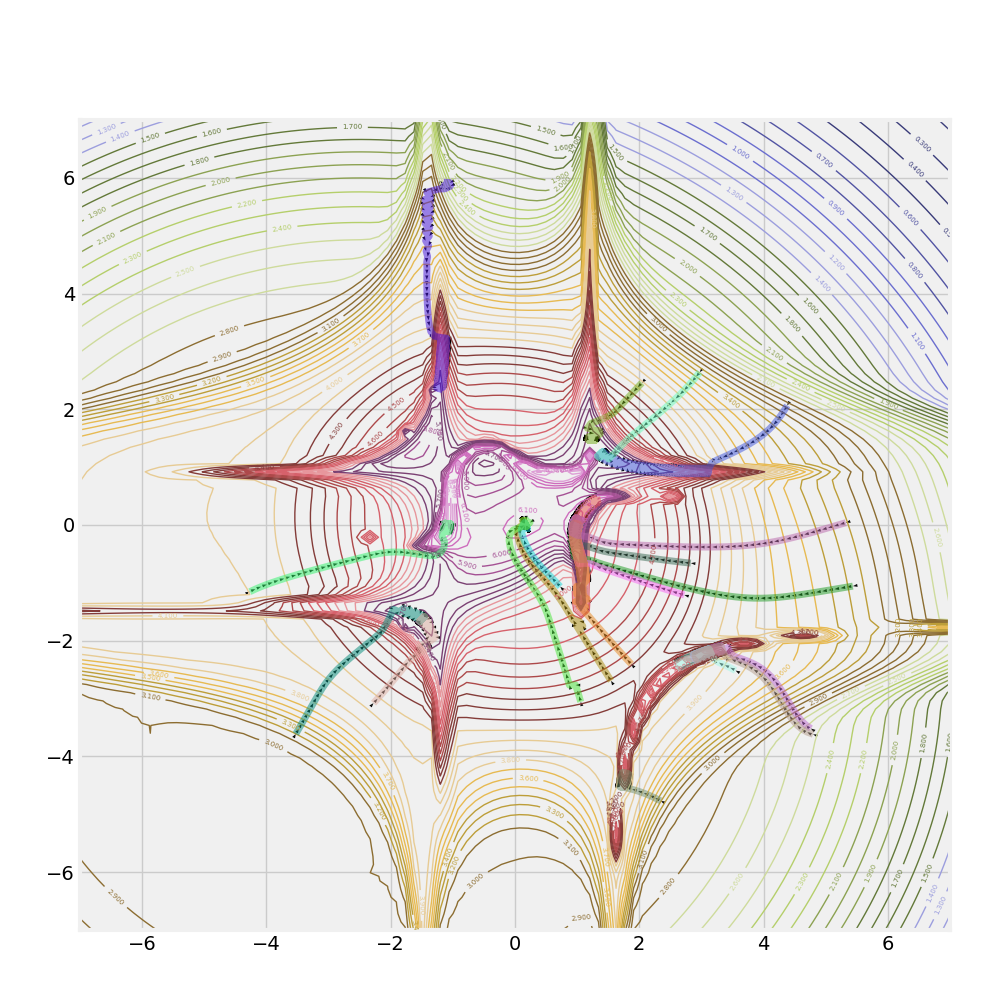

/home/tux/miniconda3/envs/ml2018/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
# TU MOŻEMY WYBRAĆ, KTÓRE OPTIMIZERY CHCEMY OBEJRZEĆ

f = f_ascent
#optimizers = gradient_ascent_optimizers
optimizers = normalized_gradient_ascent_optimizers

#f = f_descent
#optimizers = nesterov_optimizers


# TU MOŻEMY ZMIENIĆ PARAMETRY ANIMACJI
extent = (-7, 7, -7, 7)
num_linspace = 100
num_contours = 80
n_steps = 100
time_interval = 10 # [ms]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
draw_contours(ax, f, extent, num_linspace=num_linspace, num_contours=num_contours)

rng_colors = np.random.RandomState(seed=43)
colors = {k: rng_colors.rand(3,) for k in optimizers.keys()}
lines = {k: ax.plot([], [], lw=5, c=colors[k], alpha=.5)[0] for k in optimizers.keys()}
xdata = {k: [] for k in optimizers.keys()}
ydata = {k: [] for k in optimizers.keys()}

def frame_processor(frame):
    for k, v in frame.items():
        x, y = v[0]
        xdata[k].append(x)
        ydata[k].append(y)
        lines[k].set_data(xdata[k], ydata[k])
        if len(xdata[k]) > 1:
            ax.arrow(
                xdata[k][-2],
                ydata[k][-2],
                0.01 * (xdata[k][-1] - xdata[k][-2]),
                0.01 * (ydata[k][-1] - ydata[k][-2]),
                shape='full',
                lw=0,
                length_includes_head=True,
                head_width=.05,
                color="black")

def yield_n_dicts(generators, n):
    i = 0
    while i < n:
        yield {k: next(v) for k, v in generators.items()}
        i += 1

ani = animation.FuncAnimation(
    fig,
    frame_processor,
    yield_n_dicts(optimizers, n=n_steps),
    blit=True,
    interval=time_interval,
    repeat=False)